In [1]:
import os
import sys
import json
import time

import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


import geopandas as gpd
from shapely.geometry import Point, box, LineString, Polygon
from shapely.ops import unary_union

In [2]:
street_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "hotosm_are_roads_lines_shp")
state_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "are_adm_fcsc_20230515_shp_ab")

In [3]:
street_fn = os.path.join(street_dir, "hotosm_are_roads_lines.shp")
state_fn = os.path.join(state_dir, "are_admbnda_adm1_fcsc_20230515.shp")

In [4]:
streets = gpd.read_file(street_fn)

In [5]:
states = gpd.read_file(state_fn)

In [6]:
in_area_states = ['Dubai', 'Sharjah', 'Ajman', 'Umm Al Quwain']

In [7]:
states

,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
0,Abu Dhabi,أبوظبى,AE01,United Arab Emirates (the),الإمارات العربية المتحدة,AE,2020-06-01,2023-05-15,None,30.532037,5.251527,59333.583740,"MULTIPOLYGON (((53.89736 24.11700, 53.90013 24..."
1,Dubai,دبى,AE02,United Arab Emirates (the),الإمارات العربية المتحدة,AE,2020-06-01,2023-05-15,None,7.291513,0.360726,4035.707553,"MULTIPOLYGON (((56.09349 24.85550, 56.09377 24..."
2,Sharjah,الشارقة,AE03,United Arab Emirates (the),الإمارات العربية المتحدة,AE,2020-06-01,2023-05-15,None,5.560711,0.229763,2565.754933,"MULTIPOLYGON (((55.55451 25.48569, 55.57142 25..."
3,Ajman,عجمان,AE04,United Arab Emirates (the),الإمارات العربية المتحدة,AE,2020-06-01,2023-05-15,None,1.378813,0.022797,254.535146,"MULTIPOLYGON (((56.06176 24.87100, 56.06180 24..."
4,Umm Al Quwain,أم القيوين,AE05,United Arab Emirates (the),الإمارات العربية المتحدة,AE,2020-06-01,2023-05-15,None,2.471958,0.063068,702.486591,"MULTIPOLYGON (((55.77579 25.64756, 55.78445 25..."
5,Ras Al Khaimah,رأس الخيمة,AE06,United Arab Emirates (the),الإمارات العربية المتحدة,AE,2020-06-01,2023-05-15,None,5.921171,0.220312,2454.461270,"MULTIPOLYGON (((56.19052 25.33286, 56.19106 25..."
6,Fujairah,الفجيرة,AE07,United Arab Emirates (the),الإمارات العربية المتحدة,AE,2020-06-01,2023-05-15,None,3.653952,0.141731,1580.399107,"MULTIPOLYGON (((56.30220 24.98076, 56.31067 24..."


In [8]:
streets

,osm_id,oneway,name,bridge,lanes,layer,highway,width,surface,source,smoothness,geometry
0,4.009554e+06,yes,شارع الشيخ محمد بن زايد,None,6,None,motorway,None,asphalt,None,None,"LINESTRING (55.36541 25.12015, 55.36835 25.122..."
1,4.334711e+06,yes,شارع عمر بن الخطاب,None,3,None,secondary,None,asphalt,None,None,"LINESTRING (55.31174 25.27878, 55.31190 25.278..."
2,4.342760e+06,None,شارع 7,None,2,None,residential,None,asphalt,None,None,"LINESTRING (55.31816 25.27626, 55.31806 25.27689)"
3,4.342761e+06,None,19a شارع,None,None,None,residential,None,asphalt,None,None,"LINESTRING (55.32220 25.27748, 55.32223 25.277..."
4,4.342763e+06,None,13a شارع,None,None,None,residential,None,asphalt,None,None,"LINESTRING (55.32014 25.27574, 55.32025 25.274..."
...,...,...,...,...,...,...,...,...,...,...,...,...
406450,1.171249e+09,None,None,None,None,None,residential,None,None,None,None,"LINESTRING (55.50526 25.38304, 55.50524 25.383..."
406451,1.171249e+09,None,None,None,None,None,residential,None,None,None,None,"LINESTRING (55.50389 25.38242, 55.50389 25.382..."
406452,1.171249e+09,None,None,None,None,None,footway,None,None,None,None,"LINESTRING (55.39717 25.14875, 55.39723 25.148..."
406453,1.171274e+09,None,None,None,None,None,pedestrian,None,paving_stones,None,None,"LINESTRING (55.12969 25.07527, 55.12973 25.07524)"


In [9]:
within_area = streets.overlay(states[states.ADM1_EN.isin(in_area_states)], how='intersection', keep_geom_type=False)

In [10]:
within_area.highway.drop_duplicates().to_list()

['motorway',
 'secondary',
 'residential',
 'primary',
 'service',
 'unclassified',
 'motorway_link',
 'tertiary',
 'trunk',
 'trunk_link',
 'primary_link',
 'tertiary_link',
 'secondary_link',
 'track',
 'footway',
 'construction',
 'pedestrian',
 'steps',
 'raceway',
 'living_street',
 'path',
 'cycleway',
 'proposed',
 'bridleway',
 'passing_place',
 'corridor',
 'elevator',
 'toll_gantry',
 'busway',
 'services',
 'rest_area',
 'escape',
 'road']

In [11]:
all_intersections =  streets.overlay(streets, how="intersection", keep_geom_type=False)

In [12]:
len(all_intersections)

1849295

In [13]:
all_intersections = all_intersections[all_intersections.osm_id_1 != all_intersections.osm_id_2]

In [14]:
len(all_intersections)

1442840

In [15]:
all_intersections.geometry.type.drop_duplicates().to_list()

['Point', 'MultiPoint', 'MultiLineString', 'LineString', 'GeometryCollection']

In [16]:
all_intersections[all_intersections.geometry.type == 'Point']

,osm_id_1,oneway_1,name_1,bridge_1,lanes_1,layer_1,highway_1,width_1,surface_1,source_1,...,name_2,bridge_2,lanes_2,layer_2,highway_2,width_2,surface_2,source_2,smoothness_2,geometry
1,1.047820e+07,yes,شارع الشيخ محمد بن زايد,yes,6,2,motorway,None,asphalt,None,...,شارع الشيخ محمد بن زايد,None,6,None,motorway,None,asphalt,None,None,POINT (55.36541 25.12015)
2,1.071285e+07,yes,None,None,1,None,motorway_link,None,asphalt,Bing,...,شارع الشيخ محمد بن زايد,None,6,None,motorway,None,asphalt,None,None,POINT (55.38834 25.15318)
3,1.071288e+07,yes,شارع المنامة,yes,2,2,primary,None,asphalt,None,...,شارع الشيخ محمد بن زايد,None,6,None,motorway,None,asphalt,None,None,POINT (55.39127 25.16062)
4,1.071289e+07,yes,شارع المنامة,yes,2,2,primary,None,asphalt,None,...,شارع الشيخ محمد بن زايد,None,6,None,motorway,None,asphalt,None,None,POINT (55.39121 25.16045)
5,2.242780e+08,yes,None,None,None,None,motorway_link,None,None,None,...,شارع الشيخ محمد بن زايد,None,6,None,motorway,None,asphalt,None,None,POINT (55.38762 25.15145)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849285,1.171247e+09,None,None,None,None,None,construction,None,None,None,...,None,None,None,None,construction,None,None,None,None,POINT (55.28548 25.15932)
1849286,1.171247e+09,None,None,None,None,None,construction,None,None,None,...,None,None,None,None,construction,None,None,None,None,POINT (55.28492 25.15925)
1849289,1.171247e+09,None,None,None,None,None,construction,None,None,None,...,None,None,None,None,construction,None,None,None,None,POINT (55.28171 25.15728)
1849293,1.171247e+09,None,None,None,None,None,construction,None,None,None,...,None,None,None,None,construction,None,None,None,None,POINT (55.28492 25.15925)


### Navigation Algorithms

In [17]:
def haversine(point1, point2, unit="m"):
    """
    :param point1:
    :param point2:
    :return: distance in meters
    """

    # extract point lat/lng
    lng1 = point1.x
    lat1 = point1.y
    lng2 = point2.x
    lat2 = point2.y

    # convert to radians
    lng1, lat1, lng2, lat2 = map(math.radians, [lng1, lat1, lng2, lat2])

    # haversine formula
    dlng = lng2 - lng1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlng / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    if unit == "m":
        r = 6378137.0  # radius of the earth in meters
    elif unit == "km":
        r = 6378.137
    elif unit == "mi":
        r = 3959.87433
    else:
        raise ValueError("unit for distance calculation not defined")

    distance = round(c * r, 1)
    return distance

In [18]:
def create_area(position, radius=10000, unit="m", sides=6):
    lat = position.y
    lng = position.x

    lat_rad = (lat / 180) * math.pi
    lng_rad = (lng / 180) * math.pi

    if unit == "m":
        # radius = get_KM_distance(radius, unit)
        radius = radius * 0.001

    interval = (2 * math.pi) / sides
    start = math.pi / 6
    radian_bearings = [start + i * interval for i in range(sides)]

    # latitude degrees
    # equator = 110.567 km
    # poles = 110.699 km
    # 1 degree latitude ~ 111km
    # R is Radius of the earth = 6731 km
    R = 6371
    d_over_R = radius / R
    polygon_points = []
    for radian in radian_bearings:
        new_lat_rad = math.asin(
            math.sin(lat_rad) * math.cos(d_over_R) + math.cos(lat_rad) * math.sin(d_over_R) * math.cos(radian)
        )

        new_lng_rad = lng_rad + math.atan2(
            (math.sin(radian) * math.sin(d_over_R) * math.cos(lat_rad)),
            (math.cos(d_over_R) - (math.sin(lat_rad) * math.sin(new_lat_rad))),
        )

        new_lat = new_lat_rad * 180 / math.pi
        new_lng = new_lng_rad * 180 / math.pi
        polygon_points.append((new_lng, new_lat))

    # Close Loop
    polygon_points.append(polygon_points[0])
    
    return polygon_points


In [19]:
point_start = Point(55.122398605423435, 25.080786229771327)
point_end = Point(55.27199552397003, 25.161451154063858)

In [20]:
radius = haversine(point_start, point_end, unit='m')

In [21]:
hex_start = create_area(point_start, radius=radius, unit='m', sides=6)
hex_end = create_area(point_end, radius=radius, unit='m', sides=6)

In [22]:
hex_start_points = LineString(hex_start)
hex_end_points = LineString(hex_end)
direct_path_points = LineString([point_start, point_end])

In [23]:
def get_plot_data(point_start, point_end, radius):
    hex_start = create_area(point_start, radius=radius, unit='m', sides=6)
    hex_end = create_area(point_end, radius=radius, unit='m', sides=6)
    
    hex_start_points = LineString(hex_start)
    hex_end_points = LineString(hex_end)
    direct_path_points = LineString([point_start, point_end])
    
    d = {
        'name': [
            'point_start',
            'point_end',
            'hex_start',
            'hex_end',
            'direct_path'
        ], 
        'geometry': [
            point_start,
            point_end,
            hex_start_points,
            hex_end_points,
            direct_path_points
        ]
    }
    
    filter_d = {
        'name': [
            'filter_start',
            'filter_end'
        ],
        'geometry': [
            Polygon(hex_start),
            Polygon(hex_end)
        ]
    }
    
    plot_gdf = gpd.GeoDataFrame(d, geometry=d['geometry'], crs="EPSG:4326")
    plot_filter_gdf = gpd.GeoDataFrame(filter_d, geometry=filter_d['geometry'], crs="EPSG:4326")

    return plot_gdf, plot_filter_gdf

C:\Users\bcros\AppData\Local\Temp\ipykernel_27000\1650844778.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


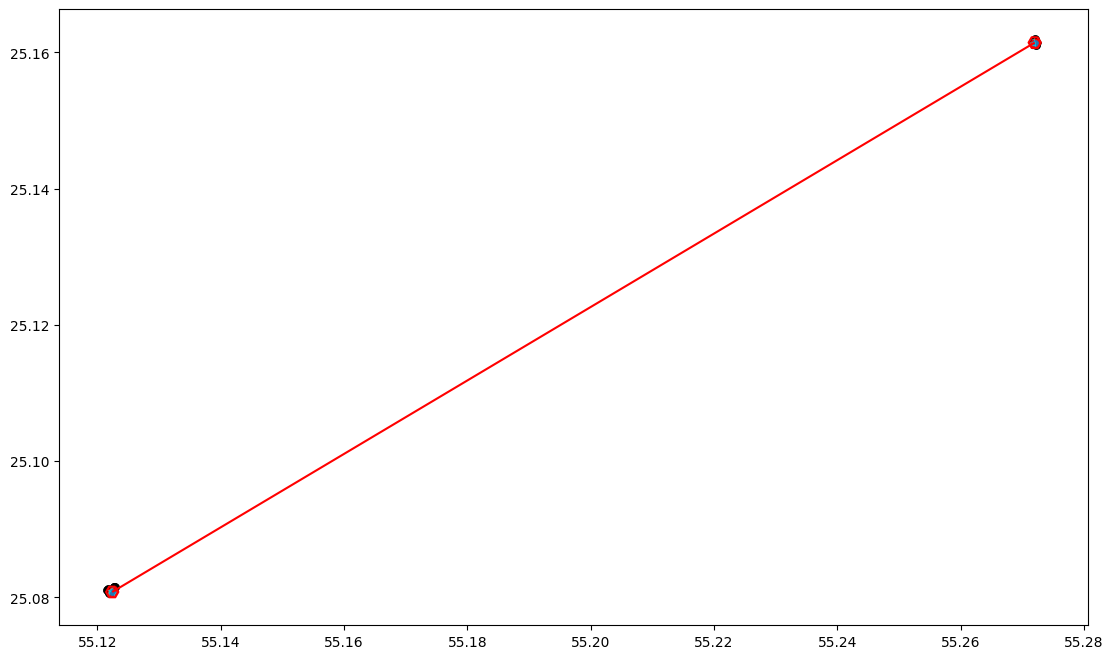

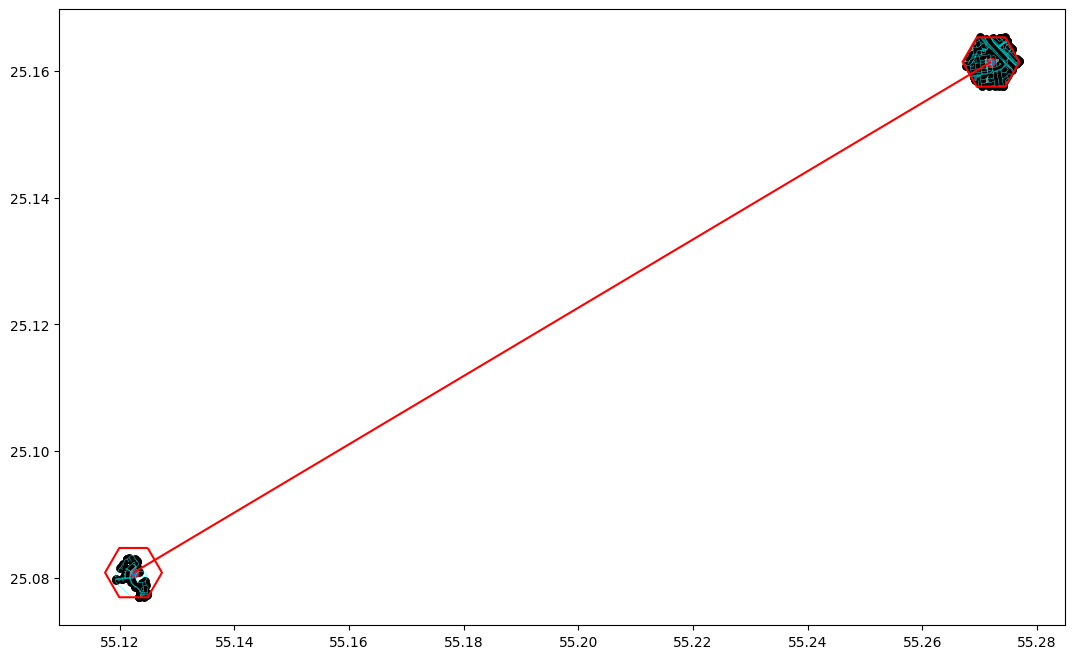

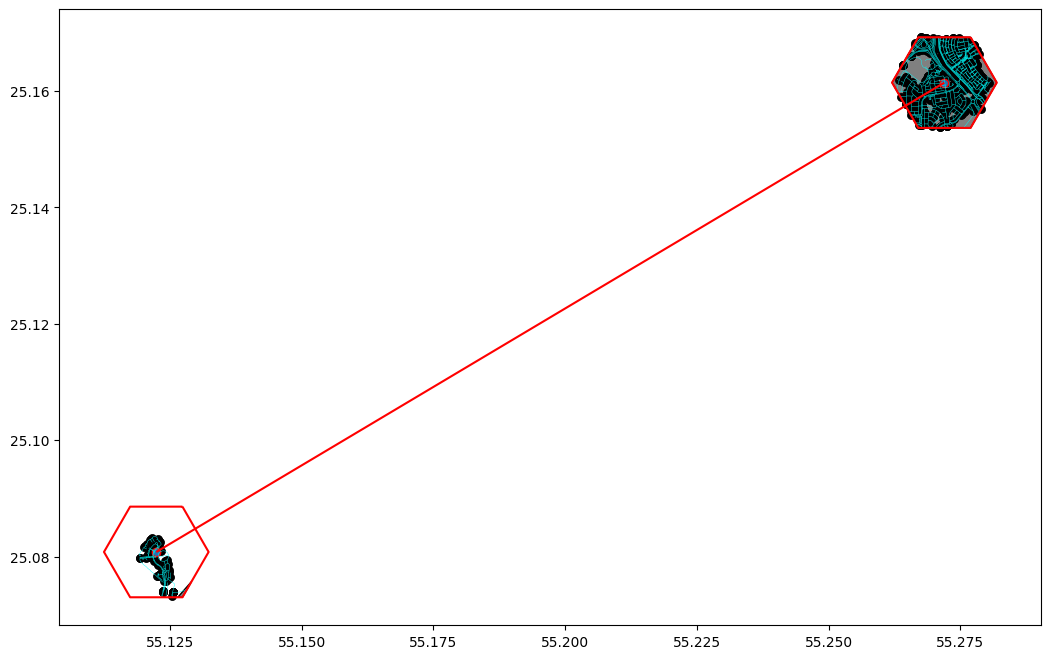

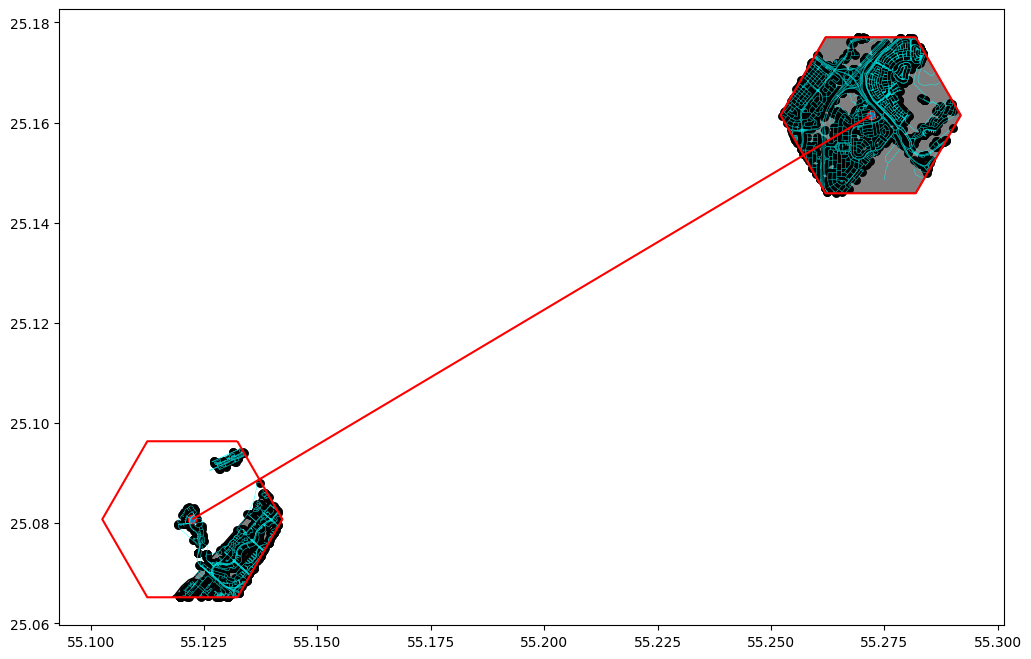

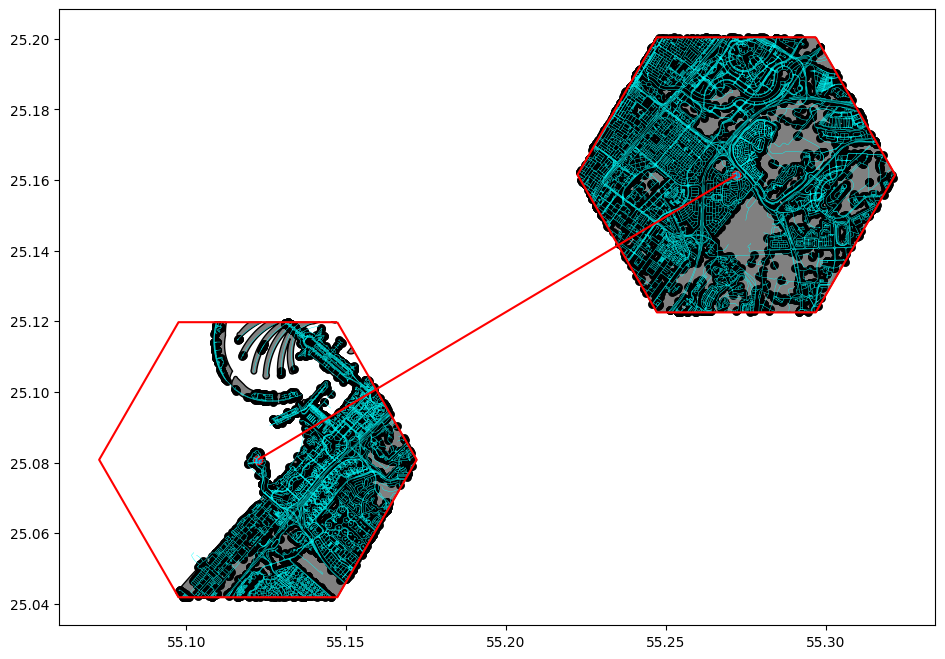

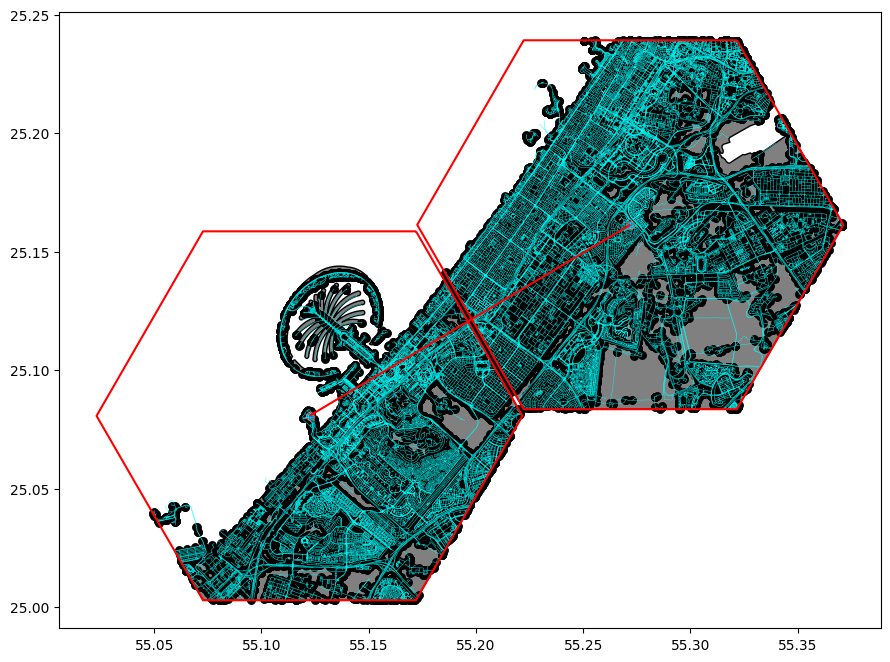

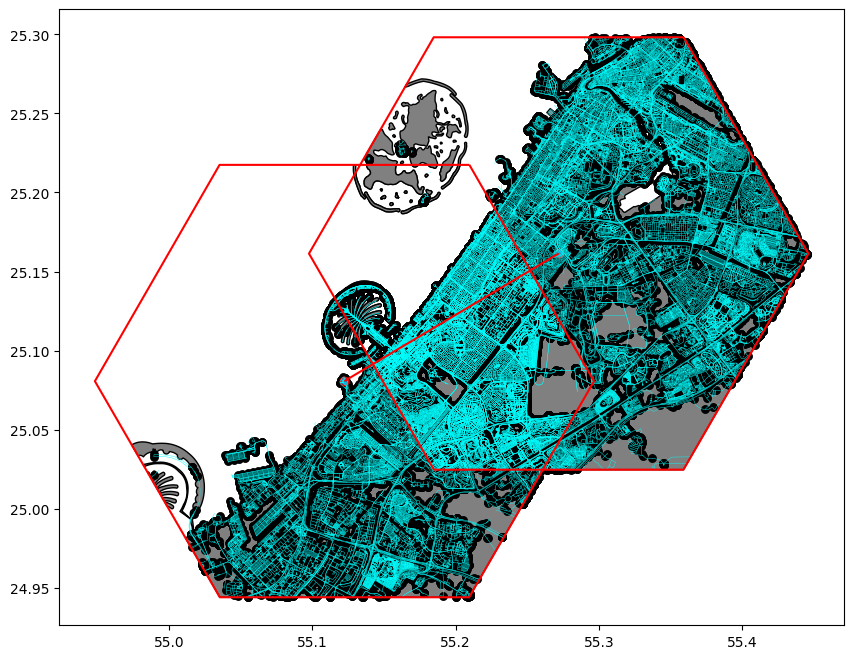

In [24]:
point_start = Point(55.122398605423435, 25.080786229771327)
point_end = Point(55.27199552397003, 25.161451154063858)
radius = haversine(point_start, point_end, unit='m')

for r_dist in [100, 500, 1000, 2000, 5000, 10000, radius]: # 20000, radius*2] :
    gdf, filter_gdf = get_plot_data(point_start, point_end, r_dist)
    streets_in_path = filter_gdf.overlay(streets, how='intersection', keep_geom_type=False)
    state_in_path = filter_gdf.overlay(states, how='intersection', keep_geom_type=False)
    intersections_in_path = filter_gdf.overlay(all_intersections[all_intersections.geometry.type == 'Point'], how='intersection', keep_geom_type=False)
    
    fig, ax = plt.subplots(figsize=(16,8))
    # states[states.ADM1_EN.isin(in_area_states)].plot(edgecolor='k',ax=ax)
    state_in_path.geometry.plot(edgecolor='k', color='grey', ax=ax)
    streets_in_path.geometry.plot(edgecolor='cyan', linewidth=0.3, ax=ax)
    intersections_in_path.geometry.plot(color='k', linewidth=0.1, ax=ax)
    gdf.geometry.plot(edgecolor='r', ax=ax)

fig.show()

In [26]:
def add_point_to_list(new_point, point_list):
    if new_point not in point_list:
        point_list.append(new_point)
        return point_list
    else:
        return False
    

C:\Users\bcros\dev\test\stretch\imports\venv\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\bcros\dev\test\stretch\imports\venv\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\bcros\dev\test\stretch\imports\venv\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

0 



C:\Users\bcros\AppData\Local\Temp\ipykernel_27000\3244170828.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_street_start['crossroads'] = current_street_start[['geometry', 'crossroads']].apply(lambda x: add_point_to_list(x[0], x[1]), axis=1)


    osm_id_count_0                                         crossroads  \
0        637303560  [POINT (55.122398605423435 25.080786229771327)...   
1        637303560  [POINT (55.122398605423435 25.080786229771327)...   
3        637303560  [POINT (55.122398605423435 25.080786229771327)...   
4        637303560  [POINT (55.122398605423435 25.080786229771327)...   
5        637303560  [POINT (55.122398605423435 25.080786229771327)...   
6        637303560  [POINT (55.122398605423435 25.080786229771327)...   
7        637303560  [POINT (55.122398605423435 25.080786229771327)...   
8        637303560  [POINT (55.122398605423435 25.080786229771327)...   
9        637303560  [POINT (55.122398605423435 25.080786229771327)...   
11       637303560  [POINT (55.122398605423435 25.080786229771327)...   
12       637303560  [POINT (55.122398605423435 25.080786229771327)...   
13       637303560  [POINT (55.122398605423435 25.080786229771327)...   
14       637303560  [POINT (55.122398605423435 25.0

NameError: name 'new_data_column' is not defined

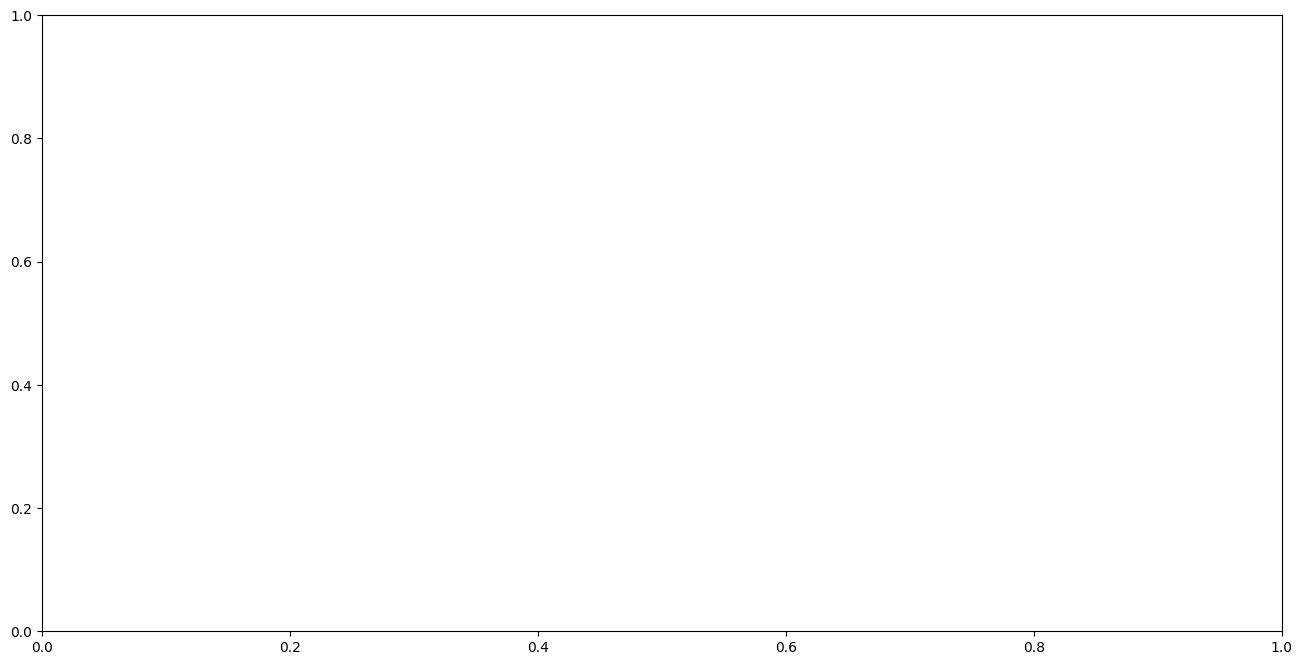

In [28]:
point_start = Point(55.122398605423435, 25.080786229771327)
point_end = Point(55.27199552397003, 25.161451154063858)
radius = haversine(point_start, point_end, unit='m')

limit_columns = ['osm_id', 'geometry']
update_columns = ['osm_id', 'geometry', 'crossroads']

MAX_JOINS = 15
count = 0

# Find Nearest Street
nearest_street_start = streets.geometry.sindex.nearest(point_start)
nearest_street_end = streets.geometry.sindex.nearest(point_end)

# Find Current Street in set of streets
current_street_start = streets[streets.index == nearest_street_start[1][0]]
current_street_start.osm_id = current_street_start.osm_id.astype('int')
current_street_end = streets[streets.index == nearest_street_end[1][0]]
current_street_end.osm_id = current_street_end.osm_id.astype('int')
streets.osm_id = streets.osm_id.astype('int')

# Track Route
current_street_start['crossroads'] = [[point_start]]
current_street_end['crossroads'] = [[point_end]]

exists_start = current_street_start.osm_id.drop_duplicates().to_list()
exists_end = current_street_end.osm_id.drop_duplicates().to_list()

absolute_start = current_street_start

fig, ax = plt.subplots(figsize=(16,8))

while count < MAX_JOINS:
    print(count, "\n")
    old_column = f'osm_id_count_{count}'
    new_column = f'osm_id_count_{count+1}'

    # Starts
    current_street_start = current_street_start[update_columns].overlay(streets[limit_columns], how='intersection', keep_geom_type=False)

    if count == 0:
        current_street_start = current_street_start.rename(columns={'osm_id_1': old_column, 'osm_id_2': new_column})
    else:
        current_street_start = current_street_start.rename(columns={'osm_id': new_column})
    
    # Cleanup
    # current_street_start = current_street_start[~current_street_start[new_column].isin(exists_start)]
    current_street_start = current_street_start[current_street_start[new_column] != current_street_start[old_column]]
    current_street_start = current_street_start[current_street_start.geometry.type == 'Point']
    current_street_start['crossroads'] = current_street_start[['geometry', 'crossroads']].apply(lambda x: add_point_to_list(x[0], x[1]), axis=1)
    current_street_start = current_street_start[current_street_start.crossroads != False]
    start_streets_new = current_street_start[new_column].drop_duplicates().to_list()

    print(current_street_start)
    
    # Ends
    current_street_end = current_street_end[update_columns].overlay(streets[limit_columns], how='intersection', keep_geom_type=False)
    
    if count == 0:
        current_street_end = current_street_end.rename(columns={'osm_id_1': old_column, 'osm_id_2': new_column})
    else:
        current_street_end = current_street_end.rename(columns={'osm_id': new_column})
        
    # Cleanup
    # current_street_end = current_street_end[~current_street_end[new_column].isin(exists_end)]
    current_street_end = current_street_end[current_street_end[new_column] != current_street_end[old_column]]
    current_street_end = current_street_end[current_street_end.geometry.type == 'Point']
    current_street_end['crossroads'] = current_street_end[['geometry', 'crossroads']].apply(lambda x: add_point_to_list(x[0], x[1]), axis=1)
    current_street_end = current_street_end[current_street_end.crossroads != False]
    end_streets_new = current_street_end[new_column].drop_duplicates().to_list()
    
    # Find Intersections
    intersect_streets = set(start_streets_new).intersection(set(end_streets_new))
    if intersect_streets:
        print("DONE")
        break

    # Continue on
    if count == 0:
        update_columns.pop(0)
        update_columns.append(old_column)
        
    update_columns.append(new_column)
    count += 1

# Convert Route to Geometry Type to Plot
current_street_start['linestring_route'] = current_street_start['route'].apply(lambda x: LineString(x))
current_street_end['linestring_route'] = current_street_end['route'].apply(lambda x: LineString(x))

# Plot
start_gdf = gpd.GeoDataFrame(current_street_start, geometry=current_street_start.linestring_route, crs="EPSG:4326")
end_gdf = gpd.GeoDataFrame(current_street_end, geometry=current_street_end.linestring_route, crs="EPSG:4326")
start_gdf.geometry.plot(color='b', linewidth=0.1, ax=ax)
absolute_start.geometry.plot(color='r', linewidth=0.2, ax=ax)
# end_gdf.geometry.plot(color='r', linewidth=0.1, ax=ax)
    
fig.show()

In [ ]:
current_street_start

In [57]:
# %time
MAX_RADIUS = 5000
# create route from start to end points
route = [point_start]
total_distance = 0

this_point = point_start
print(this_point)

# Find Nearest Street
nearest_street = streets.geometry.sindex.nearest(Point(this_point))

# Transform Nearest Street into series of poitns
current_street = streets[streets.index == nearest_street[1][0]].geometry

transform_current_street = current_street.geometry.get_coordinates(ignore_index=True)
current_street_gdf = gpd.points_from_xy(transform_current_street.x, transform_current_street.y, crs="EPSG:4326")

on_street = current_street_gdf.sindex.nearest(Point(this_point))
start_point_on_street = transform_current_street[transform_current_street.index == on_street[1][0]]
print("START", start_point_on_street.index.item())

next_point = Point(start_point_on_street.x.item(), start_point_on_street.y.item())
print(next_point)

total_distance += haversine(this_point, next_point)
print(total_distance)

# add to route
route.append(next_point)

# swap
this_point = next_point

# now we are on a road, traverse road find next intersection
print(transform_current_street)

to_start_of_line = transform_current_street.iloc[0:, start_point_on_street.index.item()+1]
to_end_of_line = transform_current_street.iloc[start_point_on_street.index.item(): -1]

print(to_start_of_line)
print(to_end_of_line)

POINT (55.122398605423435 25.080786229771327)
START 47
POINT (55.1221397 25.0809338)
30.8
            x          y
0   55.124107  25.076457
1   55.124090  25.076567
2   55.124069  25.076676
3   55.124043  25.076784
4   55.124008  25.076890
5   55.123990  25.076974
6   55.123967  25.077057
7   55.123939  25.077139
8   55.123907  25.077220
9   55.123872  25.077293
10  55.123797  25.077437
11  55.123699  25.077647
12  55.123652  25.077749
13  55.123627  25.077802
14  55.123624  25.077809
15  55.123609  25.077842
16  55.123564  25.077931
17  55.123509  25.078017
18  55.123446  25.078097
19  55.123368  25.078186
20  55.123284  25.078270
21  55.123194  25.078349
22  55.123097  25.078418
23  55.122996  25.078485
24  55.122891  25.078547
25  55.122696  25.078657
26  55.122644  25.078687
27  55.122515  25.078781
28  55.122396  25.078884
29  55.122287  25.078997
30  55.122189  25.079118
31  55.122102  25.079246
32  55.122063  25.079320
33  55.122030  25.079381
34  55.121972  25.079495
35  55.121

IndexError: single positional indexer is out-of-bounds

In [ ]:
within_area[within_area.index == nearest_street[1][0]]

### Find Point Frequency for Streets

In [ ]:
bucket_of_points = {}
for rw in within_area_geom.index:
    linestring = within_area_geom.iloc[rw].wkt
    point_list = linestring.split('(')[1].replace(')', '').split(', ')
    # round off to 2nd decimal for 1.11 km bims
    # round_off = 2
    # round off to 3rd decimal for 111 m bins
    round_off = 3

    for pt in point_list:
        if pt != '':
            lng, lat = pt.split(' ')
            lng = round(float(lng), round_off)
            lat = round(float(lat), round_off)
    
            point = f"{str(lng)} {str(lat)}"
    
            if point not in bucket_of_points:
                bucket_of_points[point] = 1
            else:
                bucket_of_points[point] += 1

In [ ]:
len(bucket_of_points)

In [ ]:
sorted_bucket_of_points = dict(sorted(bucket_of_points.items(), key=lambda x:x[1], reverse=True))

In [ ]:
1/10**(round_off-1)/2

In [ ]:
sorted_bucket_of_points

In [ ]:
ranked_points = list(sorted_bucket_of_points.keys())

In [ ]:
increment = 1/10**(round_off-1)/2

In [ ]:
bucket_of_rects = {}
already_counted = []
increment = 1/10**(round_off-1)/2

for i in range(0, len(ranked_points)):
    pt = ranked_points[i]
    if pt not in already_counted:
        freq = sorted_bucket_of_points[pt]
        bucket_of_rects[pt] = freq
        
        lng, lat = pt.split(' ')
        min_lng = float(lng) - increment
        max_lng = float(lng) + increment
        min_lat = float(lat) - increment
        max_lat = float(lat) + increment
            

        for j in range(i, len(ranked_points)):
            if pt_i not in already_counted:
                pt_i = ranked_points[j]
                freq_i = sorted_bucket_of_points[pt_i]
                lng_i, lat_i = pt_i.split(' ')
                lng_i = float(lng_i)
                lat_i = float(lat_i)
                if (lat_i >= min_lat and lat_i <= max_lat) and (lng_i >= min_lng and lng_i <= max_lng):
                    bucket_of_rects[pt] += freq_i
                    already_counted.append(pt_i)
                

In [ ]:
len(bucket_of_rects)

In [ ]:
dense_points = pd.DataFrame(sorted_bucket_of_points)

In [ ]:
data = {'rank': [], 'frequency': [], 'wkt': []}
counter = 0
for pt, freq in sorted_bucket_of_points.items():
    data['rank'].append(counter)
    data['frequency'].append(freq)
    data['wkt'].append(f"POINT({pt})")
    counter += 1

In [ ]:
df = pd.DataFrame(data)

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['wkt']), crs="EPSG:4326")

In [ ]:
gdf

In [ ]:
# within_area = gdf.overlay(states[states.ADM1_EN.isin(in_area_states)], how='intersection', keep_geom_type=False)

In [ ]:
top_areas = gdf[gdf['rank'] <= 10]

In [ ]:
top_areas

In [ ]:
remaining = gdf[gdf['rank'] > 10]

In [ ]:
bundled_points = top_areas.sjoin_nearest(remaining[['frequency', 'wkt', 'geometry']], how='inner', max_distance=0.1, distance_col='distance')

In [ ]:
sum_rank_intersect = bundled_points[['rank', 'frequency_right']].groupby(by='rank').sum().reset_index()

In [ ]:
top_areas = pd.merge(top_areas, sum_rank_intersect, on='rank')

In [ ]:
top_areas

In [ ]:
top_areas['frequency'] += top_areas['frequency_right']

In [ ]:
top_areas

In [ ]:
total_freq = top_areas['frequency'].sum()
max_freq = top_areas['frequency'].max()
min_freq = top_areas['frequency'].min()

In [ ]:
top_areas['probability'] = top_areas.frequency.apply(lambda x: x/total_freq)

In [ ]:
top_areas

In [ ]:
# top_areas = top_areas[['rank', 'frequency', 'wkt', 'ADM1_EN', 'geometry', 'frequency_right', 'probability']]

top_areas = top_areas.sort_values('probability', ascending=False)
top_areas = top_areas.reset_index(drop=True)

In [ ]:
iterative_p = 0
for rw in top_areas.index:
    p_i = top_areas.iloc[rw].probability
    iterative_p += p_i
    top_areas.loc[rw, 'iterative_p'] = iterative_p

In [ ]:
top_areas

In [ ]:
fig, ax = plt.subplots(figsize=(6,8))
states[states.ADM1_EN.isin(in_area_states)].plot(edgecolor='k',ax=ax)
# within_area.plot(edgecolor='k', ax=ax)
top_areas.centroid.plot(markersize=1, color='cyan', ax=ax, label="top areas")

In [ ]:
# create code block
increment = 1/10**(round_off-1)/2
for rw in top_areas.index:
    row_data = top_areas.iloc[rw]
    lng = row_data.geometry.centroid.x
    lat = row_data.geometry.centroid.y
    min_lng = lng - increment
    max_lng = lng + increment
    min_lat = lat - increment
    max_lat = lat + increment
    iter_p = row_data.iterative_p
    print(f"elif selector <= {iter_p}:")
    print("\tuser_address = Address(")
    print(f"\t\tlat=random_coords({min_lat}, {max_lat}),")
    print(f"\t\tlng=random_coords({min_lng}, {max_lng}),")
    print()
    